In [21]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [22]:
#Data Source Path
sourcedata=f'../SourceData/DataScienceSalary2021to2023.csv'

In [23]:
#Read the Dataset into a Dataframe and Read top 5 records
df = pd.read_csv(sourcedata)
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [24]:
#Understanding the Data Types and Columns with Null Records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [25]:
#Describe the Datset
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [26]:
#Display the Shape of the dataset
print(df.shape)

(3761, 9)


In Data Analysis We will Analyize to find out the following things
  1. Missing Values
  2. All the numerical variables
  3. Distribution of Numerical variables
  4. Categorical Variables
  5. Caridnality of Categorical Variables
  6. Outliers
  7. Relationship between Independent and Dependent features


In [27]:
#Here with find the percentage of nan values present in each feature
#Step-1 : Make the list of features which has missing values
feature_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

#Step-2 : Print the Feature name and percentage of missing values
for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4),"% Missng values")

Find the Relation between  missing values in Independent variables and dependent variables

In [28]:
for feature in feature_with_na:
    data = df.copy()
    #Lets make a variable that indicates 1 if the observations was missing or else 0
    data[feature]=np.where(data[feature].isnull(),1,0)
    #Lets calculate the mean Salary where Observation is missing
    data.groupby(feature)['salary_in_usd'].median().plot.bar()
    plt.title(feature)
    plt.show()    


Find all numerical variables

In [29]:
#List of all numerical features
numerical_features = [features for features in df.columns if df[features].dtypes != 'O'] #O stands for Objects or String Data type
print('Number of numerical variables :', len(numerical_features))

#Print the sample Continous feature values
df[numerical_features].head()

Number of numerical variables : 3


,work_year,salary,salary_in_usd
0,2023,213660,213660
1,2023,130760,130760
2,2023,100000,100000
3,2023,30000,30000
4,2023,204620,204620


Temporal variables (Eg : Datetime variables)

From the Dataset we have 1 year variables. We have extract information from the datetime variables like no of years or no of days.One Example of this specific scenario can be difference in years between current year actual salary  and last year salary and the difference. This analysis will be done in feature engineering.

In [30]:
#List of all feature with year information
year_feature = [feature for feature in df.columns if 'Yr' in feature or 'year' in feature]
print(year_feature)

#Explore the Contents of the year variable
for feature in year_feature:
    print(feature,df[feature].unique())

['work_year']
work_year [2023 2022 2021 2020]


Text(0.5, 1.0, 'Salary vs Year')

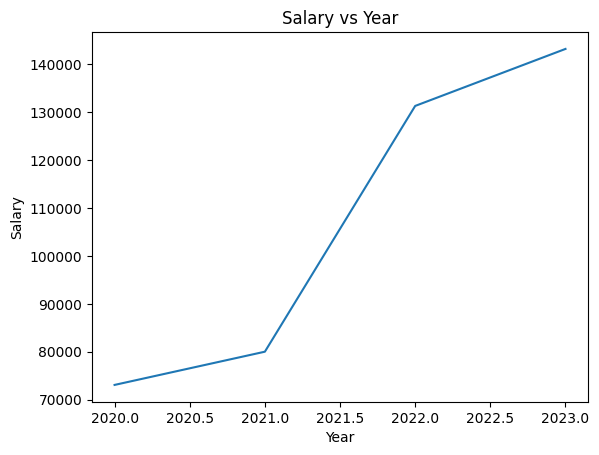

In [31]:
#Lets Analyze the temporal Datetime variable
#We will check whether there is relation between year and Salary
df.groupby('work_year')['salary_in_usd'].median().plot()
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Salary vs Year')

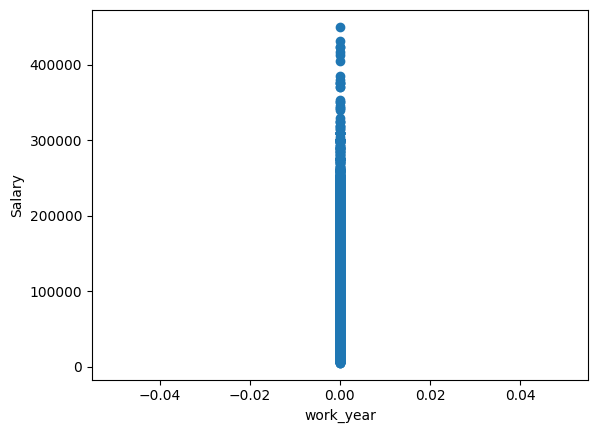

In [32]:
## Used to compare the Salary between joining and resigning year ..just and example
##Compare the difference between All years features with Sales Prices 
for feature in year_feature:
    if feature !='YrSold':
        data =df.copy()
        data[feature] = data [feature] - data[feature]

        plt.scatter(data[feature],data['salary_in_usd'])
        plt.xlabel(feature)
        plt.ylabel('Salary')
        plt.show()

In [33]:
##Numerical variables are of 2 types
## Continous and Discrete variables
##Discrete varaibles are unique set of categorical variables

discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())< 25 and feature not in year_feature]
print(discrete_feature)
print('Discrete variable count: {}'.format(len(discrete_feature)))


[]
Discrete variable count: 0


In [34]:
#Lets find the relationship between discrete feature and Salary
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['salary_in_usd'].median().plot.bar()
    plt.xlabel('feature')
    plt.ylabel('Salary')
    plt.title(feature)
    plt.show()

In [35]:
##Numerical variables are of 2 types
##Continous and Discrete variables
## Continuous variables are  measure score in which each individual value for the 
## measure can fall anywhere along a continuous 
## scale and aggregated using a variety of methods 
## such as the calculation of a mean or median

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print(continuous_feature)
print('continuous_feature count: {}'.format(len(continuous_feature)))


['salary', 'salary_in_usd']
continuous_feature count: 2


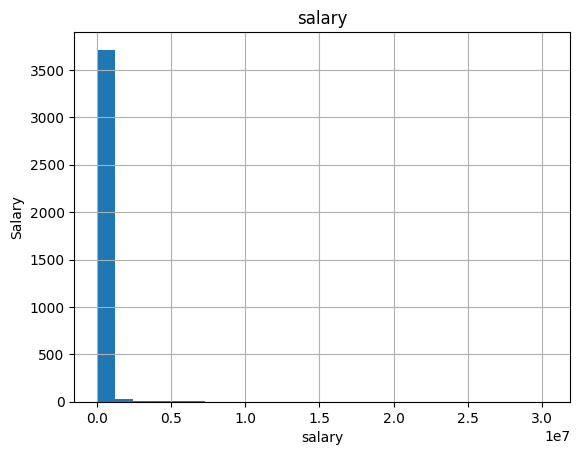

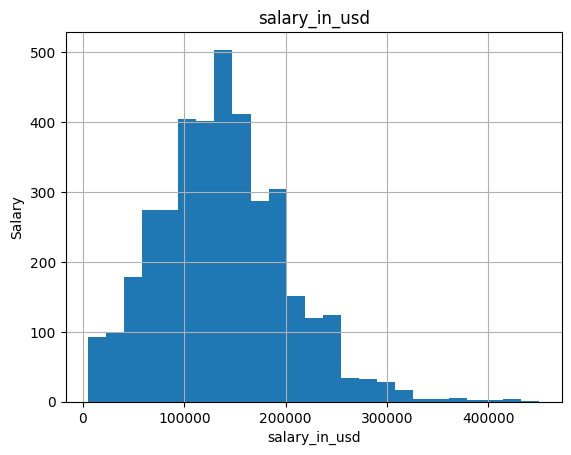

In [36]:
#Lets Analyze the continous values by creating the histogram to understand the distribution of the data
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.title(feature)
    plt.show()

The Above Graph indicates that Salary does not have gausian distribution and data in not normalized and needs standard normal distribution and data is skewed data. And log normalization must be used to solve the Skewed data and handle non gausian distribution to gausian distribution

Whereas Salary in Usd seems like having gausian distribution and data is normally distributed.

salary


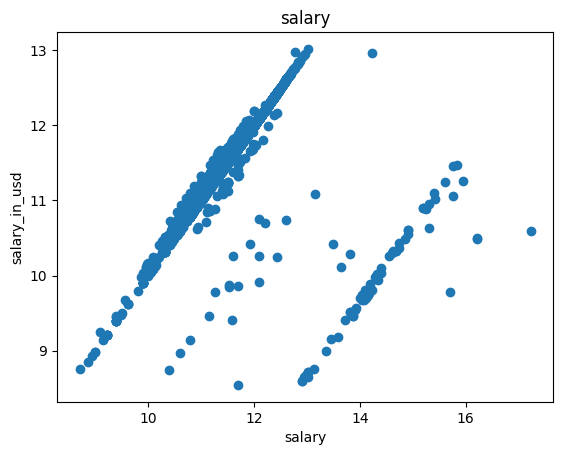

salary_in_usd


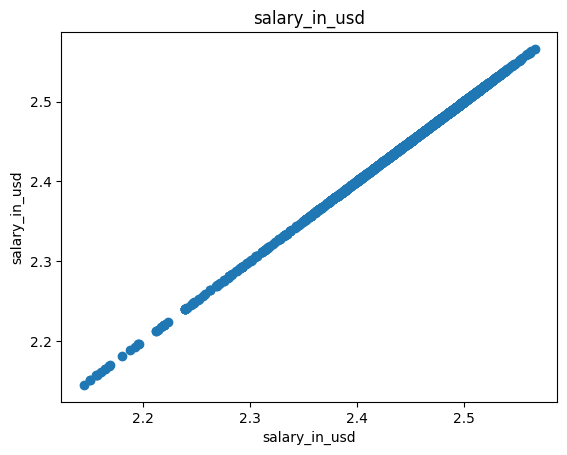

In [37]:
#Using Logarithmic transformation for transforming non gausian distribution to gausian distribution
#for continuous variables

for feature in continuous_feature:
    print(feature) 
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['salary_in_usd']=np.log(data['salary_in_usd'])
        plt.scatter(data[feature],data['salary_in_usd'])
        plt.xlabel(feature)
        plt.ylabel('salary_in_usd')
        plt.title(feature)
        plt.show()


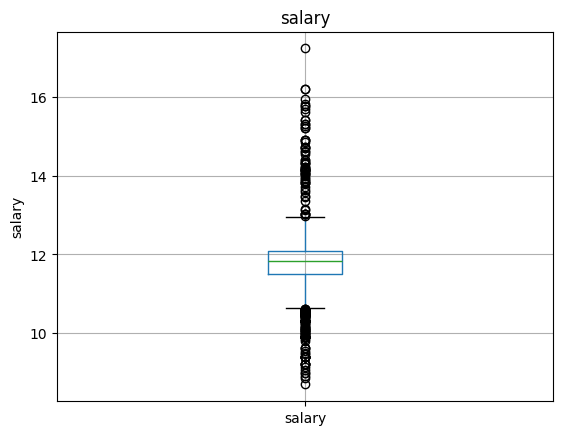

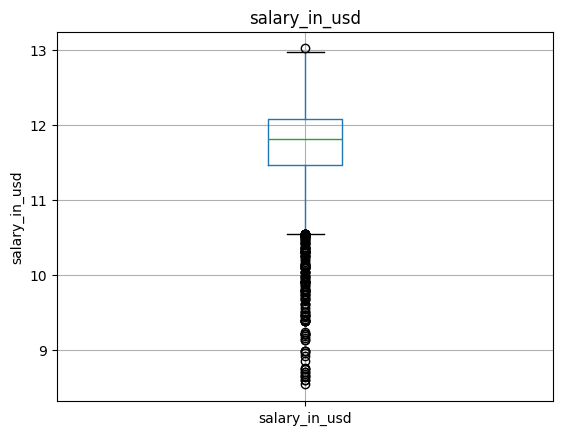

In [38]:
#Find Outliers within the continous variable data
#Box plot to find the outliers only for continous variable and not categorical varaibles
for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [39]:
#Categorical Data Analysis and variance on salary
categorical_feature=[feature for feature in df.columns if df[feature].dtypes == 'O']
#categorical_feature

for feature in categorical_feature:
    data = df.copy()
    #data.groupby(feature)['salary_in_usd'].median().plot.bar()
    print("The Feature {} has {} unique number of categories".format(feature,len(data[feature].unique())))


The Feature experience_level has 4 unique number of categories
The Feature employment_type has 4 unique number of categories
The Feature job_title has 93 unique number of categories
The Feature salary_currency has 20 unique number of categories
The Feature company_location has 72 unique number of categories
The Feature company_size has 3 unique number of categories


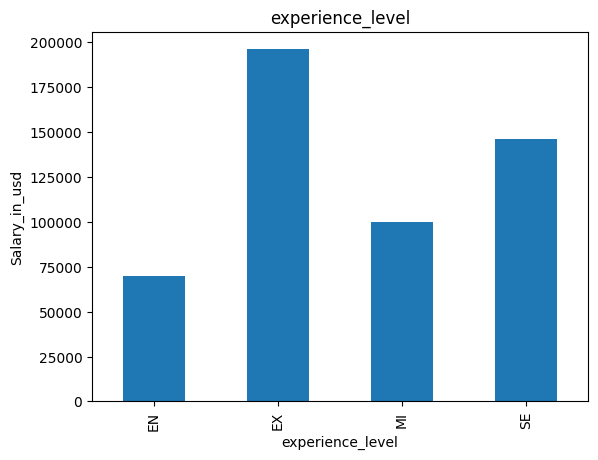

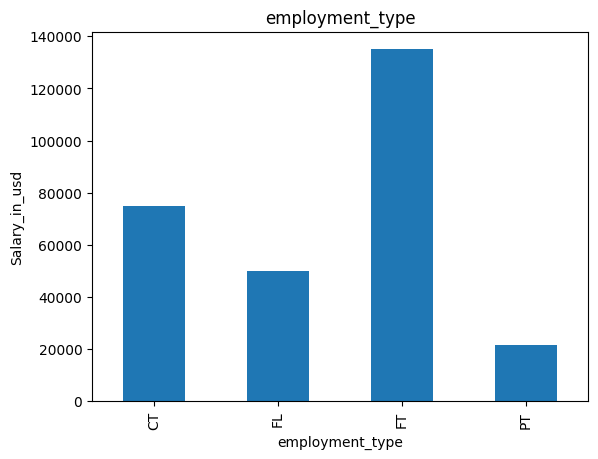

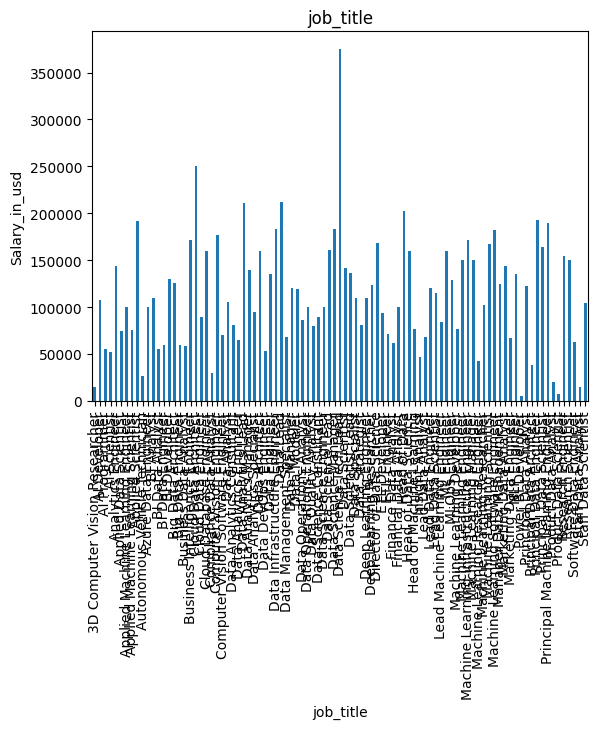

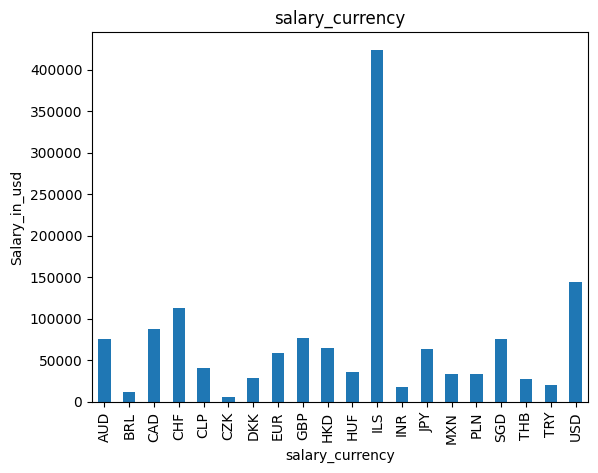

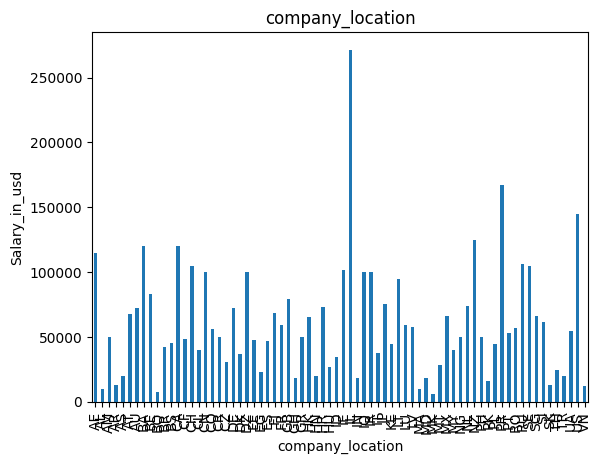

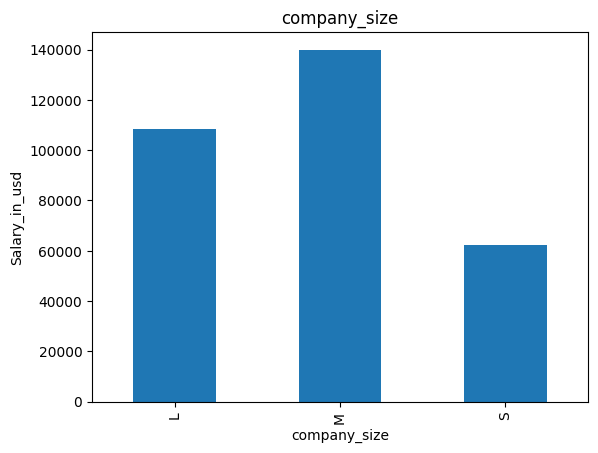

In [40]:
#Find the Relationship between categorical feature and dependent variable salary_in_usd
for feature in categorical_feature:
    data = df.copy()
    data.groupby(feature)['salary_in_usd'].median().plot.bar()
    #plt.xticks(range(len(data[feature])), data[feature], rotation=45, ha="right")
    plt.xlabel(feature)
    plt.ylabel('Salary_in_usd')
    plt.title(feature)
    plt.show()